# LISI: (Local inverse Simpson’s index): measures degree of batch mixing in a low-dimensional embedding
#### "Instead of a fixed number of nearest neighbors as in the case of kBET (https://github.com/theislab/kBET), LISI selects the nearest neighbors based on the local distribution of distances with a fixed perplexity"
#### "The selected neighbors are then used to compute the inverse Simpson’s index for diversity, which is the effective number of types present in this neighborhood"

In [2]:
library(lisi)
library(Seurat)
library(harmony)
library(magrittr)
library(gridExtra)
library(ggthemes)
library(scales)
library(pheatmap)
library(dplyr)
library(monocle)
library(reticulate)
library(ggbeeswarm)
library(ggrepel)
library(plyr)
library(ggplot2)
library(gridExtra)
library(ggthemes)
library(scales)
library(pheatmap)
library(dplyr)
library(RColorBrewer)
library(ggbeeswarm)
library(ggrepel)
library(patchwork)
library(MASS)
library(matrixStats)
library(viridis)
library(pbapply)
library(parallel)
library(grid)
library(ggpubr)
library(ggridges)
library(tidyverse)
# library(hrbrthemes)

# Load results

In [6]:
set2 = c("#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3", "#A6D854", "#FFD92F", "#E5C494", "#B3B3B3")

In [3]:
res <- readRDS("LISI_before_harmony_2020-12-02.rds")
res0 <- readRDS("LISI_before_harmony_theta0_2020-12-02.rds")
res1 <- readRDS("LISI_before_harmony_theta1_2020-12-02.rds")
res2 <- readRDS("LISI_before_harmony_theta2_2020-12-02.rds")

In [4]:
plot_all <- rbind(res, res0, res1, res2)
plot_all$type <- c(rep("no", nrow(res)), rep("theta0", nrow(res0)), rep("theta1", nrow(res1)), rep("theta2", nrow(res2)))
plot_all[1:4,]

key,val,type
sample,6.836737,no
sample,5.254105,no
sample,5.309949,no
sample,5.548224,no


type,val
no,1.061428
theta0,1.064992
theta1,1.068893
theta2,1.372620


Picking joint bandwidth of 0.17
Picking joint bandwidth of 0.00801
Warning message:
"Removed 26 rows containing non-finite values (stat_density_ridges)."

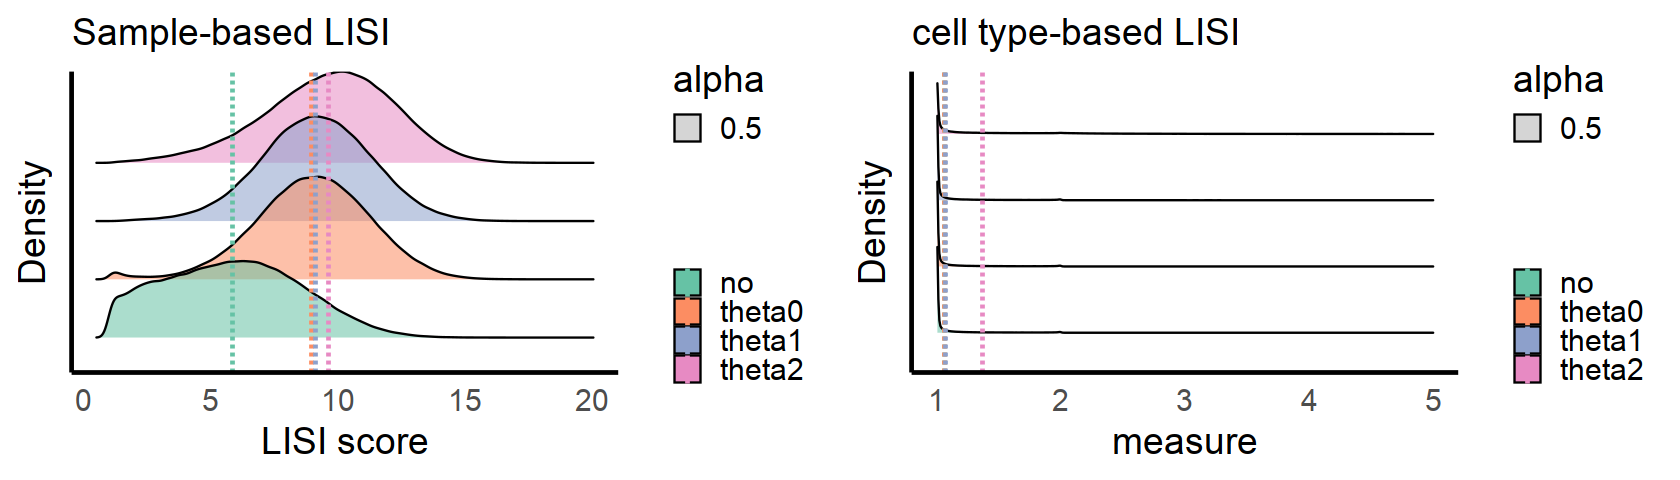

In [14]:
options(repr.plot.height = 4, repr.plot.width = 14)

cdat <- ddply(plot_all[which(plot_all$key == "sample"),], "type", summarise, val=mean(val))
p1 <- ggplot(plot_all[which(plot_all$key == "sample"),],
       aes(x = val, y = type)) +
  geom_density_ridges(aes(fill = type, alpha = 0.5)) +
  geom_vline(data=cdat, aes(xintercept=val,  colour=type), linetype="dashed", size=1) +
  scale_fill_manual(values = set2, name = "") +
  scale_color_manual(values = set2, name = "") +
  labs(
      x = "LISI score",
      y = "Density",
      title = paste0("Sample-based LISI", sep="")
      ) +
  theme_classic(base_size = 22) +
  theme(
#     legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=22)
  )


cdat <- ddply(plot_all[which(plot_all$key == "cell_type"),], "type", summarise, val=mean(val))
cdat
p2 <- ggplot(plot_all[which(plot_all$key == "cell_type"),],
       aes(x = val, y = type)) +
  geom_density_ridges(aes(fill = type, alpha = 0.5)) +
  geom_vline(data=cdat, aes(xintercept=val,  colour=type), linetype="dashed", size=1) +
  scale_x_continuous(name="measure", limits=c(1, 5), breaks=c(1:5)) +
  scale_fill_manual(values = set2, name = "") +
  scale_color_manual(values = set2, name = "") +
  labs(
      x = "LISI score",
      y = "Density",
      title = paste0("cell type-based LISI", sep="")
      ) +
  theme_classic(base_size = 22) +
  theme(
#     legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=22)
  )

all <- ggarrange(p1, p2, ncol = 2)
all
ggsave(file = paste("protein_all_celltype_umap", ".pdf", sep = ""), all, width = 14, height = 4, dpi = 300)

# Compare theta 0 vs theta 1

In [55]:
plot_all <- cbind(res0, res1)
plot_all <- plot_all[, -3]
colnames(plot_all) <- c("type", "theta0", "theta1")
plot_all[1:4,]
dim(plot_all)
table(plot_all$type)

,type,theta0,theta1
,<chr>,<dbl>,<dbl>
1,sample,11.23122,12.85044
2,sample,12.50480,10.91167
3,sample,13.82883,12.36297
4,sample,8.40979,10.38711


[1] 678346      3


cell_type    sample 
   339173    339173 

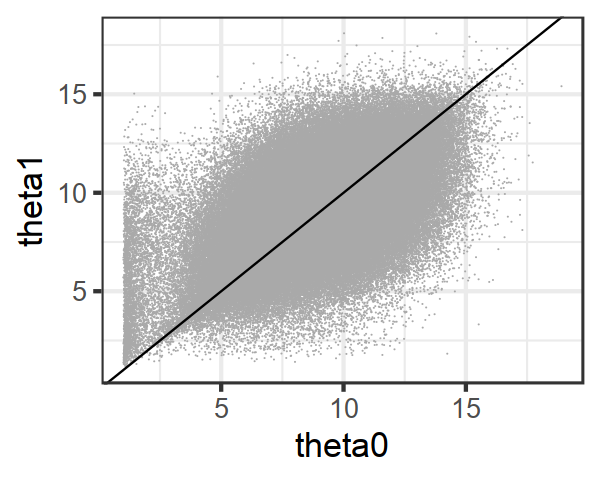

In [63]:
options(repr.plot.height = 4, repr.plot.width = 5)
ggplot() +
  geom_point(
  data = plot_all[which(plot_all$type == "sample"),],
    mapping = aes_string(x = "theta0", y = "theta1", fill = "type"),
    size = 0.3, stroke = 0.001, shape = 21
  ) +
  geom_abline(slope=1, intercept=0) +
  scale_fill_manual(values = "darkgrey", name = "") +
  theme_bw(base_size = 20) +
  theme(
    legend.position = "none",
#     axis.text = element_blank(),
#     axis.ticks = element_blank(),
#     panel.grid = element_blank(),
    plot.title = element_text(color="black", size=22, face = "italic")
  )